In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
data = pd.read_csv('Telecom_Customer_Details.csv')
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: >

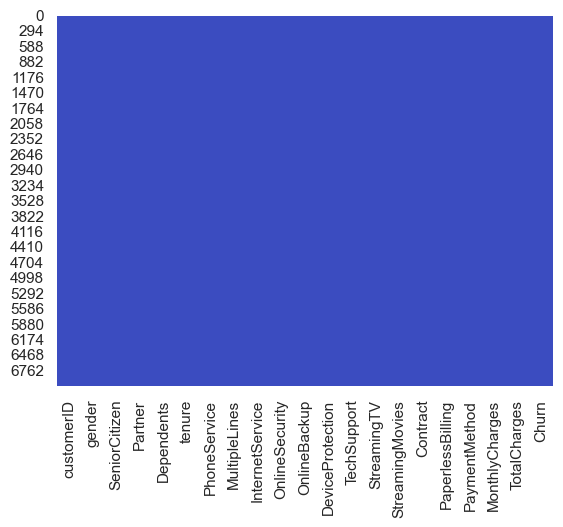

In [6]:
sns.heatmap(data.isnull(), cmap='coolwarm', cbar= False)

In [7]:
print("***********************************")
print("Rows\t\tMissing Values")
print("***********************************")
print(data.isnull().sum())
print("***********************************")
print(data.isnull().sum().sum())

***********************************
Rows		Missing Values
***********************************
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
***********************************
0


In [8]:
# Here we don't have any missing value

In [9]:
print("***********************************")
print("Rows\t\tData Type")
print("***********************************")
print(data.dtypes)
print("***********************************")

***********************************
Rows		Data Type
***********************************
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
***********************************


In [10]:
# Here we can see that we have lots of items having data types "Object"

In [11]:
data.describe().T

count  mean   std   min   25%   50%   75%    max
SeniorCitizen  7043.00  0.16  0.37  0.00  0.00  0.00  0.00   1.00
tenure         7043.00 32.37 24.56  0.00  9.00 29.00 55.00  72.00
MonthlyCharges 7043.00 64.76 30.09 18.25 35.50 70.35 89.85 118.75

In [12]:
data.TotalCharges.value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [13]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan)

In [14]:
data['TotalCharges'].isnull().sum()/len(data)*100

0.1561834445548772

In [15]:
data.TotalCharges.value_counts()

TotalCharges
20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6530, dtype: int64

In [16]:
data = data[data['TotalCharges'].notnull()]
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [17]:
data.shape

(7032, 21)

In [18]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [20]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [21]:
data = data.drop('customerID', axis=1)

In [22]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = data.copy(deep=True)

text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features:
    df1[i] = le.fit_transform(df1[i])
    print(i, ' : ', df1[i].unique(), ' = ', le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [24]:
df1['gender'].value_counts()

gender
1    3549
0    3483
Name: count, dtype: int64

In [25]:
df1['Partner'].value_counts()

Partner
0    3639
1    3393
Name: count, dtype: int64

In [26]:
data.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [27]:
df1.describe().T

count    mean     std   min    25%     50%     75%     max
gender           7032.00    0.50    0.50  0.00   0.00    1.00    1.00    1.00
SeniorCitizen    7032.00    0.16    0.37  0.00   0.00    0.00    0.00    1.00
Partner          7032.00    0.48    0.50  0.00   0.00    0.00    1.00    1.00
Dependents       7032.00    0.30    0.46  0.00   0.00    0.00    1.00    1.00
tenure           7032.00   32.42   24.55  1.00   9.00   29.00   55.00   72.00
PhoneService     7032.00    0.90    0.30  0.00   1.00    1.00    1.00    1.00
MultipleLines    7032.00    0.94    0.95  0.00   0.00    1.00    2.00    2.00
InternetService  7032.00    0.87    0.74  0.00   0.00    1.00    1.00    2.00
OnlineSecurity   7032.00    0.79    0.86  0.00   0.00    1.00    2.00    2.00
OnlineBackup     7032.00    0.91    0.88  0.00   0.00    1.00    2.00    2.00
DeviceProtection 7032.00    0.90    0.88  0.00   0.00    1.00    2.00    2.00
TechSupport      7032.00    0.80    0.86  0.00   0.00    1.00    2.00    2.00
StreamingTV      7032.00    0.98    0.89  0.00   0.00    1.00    2.00    2.00
StreamingMovies  7032.00    0.99    0.89  0.00   0.00    1.00    2.00    2.00
Contract         7032.00    0.69    0.83  0.00   0.00    0.00    1.00    2.00
PaperlessBilling 7032.00    0.59    0.49  0.00   0.00    1.00    1.00    1.00
PaymentMethod    7032.00    1.57    1.07  0.00   1.00    2.00    2.00    3.00
MonthlyCharges   7032.00   64.80   30.09 18.25  35.59   70.35   89.86  118.75
TotalCharges     7032.00 2283.30 2266.77 18.80 401.45 1397.47 3794.74 8684.80
Churn            7032.00    0.27    0.44  0.00   0.00    0.00    1.00    1.00

In [28]:
df1['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

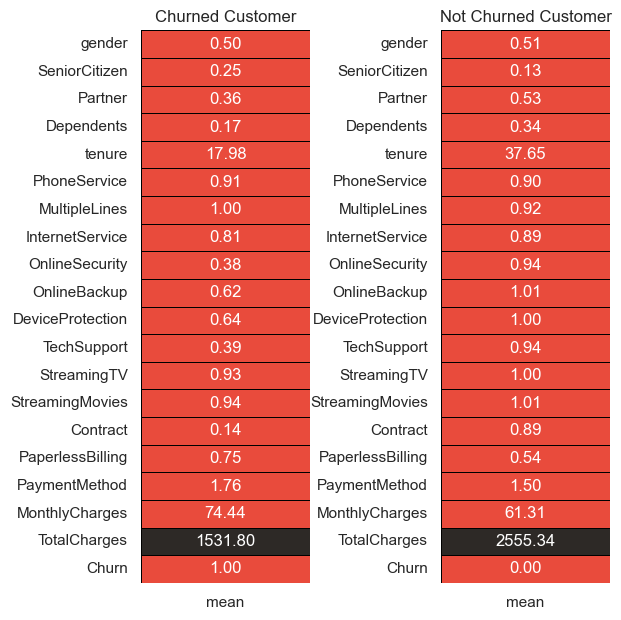

In [29]:
colors = ['#E94B3C', '#2D2926']

churn = df1[df1['Churn']==1].describe().T
not_churn = df1[df1['Churn']==0].describe().T

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6,6))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')

plt.title('Churned Customer')

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')
plt.title('Not Churned Customer')

fig.tight_layout(pad=0)

# EDA

In [30]:
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [31]:
data.describe()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
count        7032.00 7032.00         7032.00       7032.00
mean            0.16   32.42           64.80       2283.30
std             0.37   24.55           30.09       2266.77
min             0.00    1.00           18.25         18.80
25%             0.00    9.00           35.59        401.45
50%             0.00   29.00           70.35       1397.47
75%             0.00   55.00           89.86       3794.74
max             1.00   72.00          118.75       8684.80

In [32]:
data['TotalCharges'].nunique()

6530

In [33]:
col = list(df1.columns)
categorical_features = []
numerical_features = []

for i in col:
    if len(data[i].unique()) >6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
print('categorical_features :', *categorical_features)
print()
print("numerical_features :", *numerical_features)

categorical_features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn

numerical_features : tenure MonthlyCharges TotalCharges


In [34]:
list(df1.columns)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [35]:
df1.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

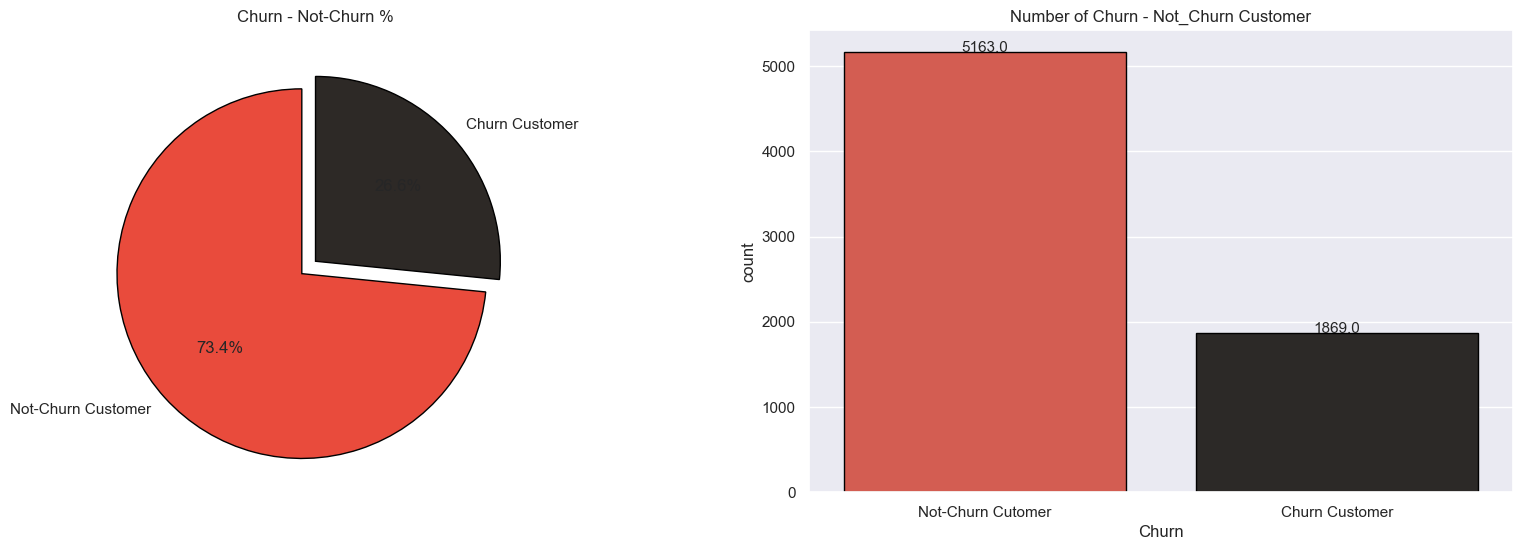

In [36]:
l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
plt.subplot(1,2,1)
plt.pie(circle, labels = ['Not-Churn Customer', 'Churn Customer'], autopct = '%1.1f%%', startangle=90,
        explode = (0.1,0), colors = colors, wedgeprops  = {'edgecolor' : 'black', 
                                                           'linewidth':1, 'antialiased' : True})
plt.title('Churn - Not-Churn %');

plt.subplot(1,2,2)

ax = sns.countplot(x='Churn', data = data, palette = colors, edgecolor = 'black')

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment = 'center', fontsize=11)
ax.set_xticklabels(['Not-Churn Cutomer', 'Churn Customer'])

plt.title('Number of Churn - Not_Churn Customer');
plt.show()    

In [37]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [38]:
# gender, SeniorCitizen, Partner, Dependents

In [39]:
# Case 1 : Customer information
# Case 2 : Payment information 
# Case 3 : Service Subscribed

In [40]:
categorical_features
# numerical_features = []

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [41]:
# Removing Churn variable as it's target
categorical_features.remove('Churn')

In [42]:
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [43]:
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [44]:
# Case 1 : Customer information
# Case 2 : Payment information 
# Case 3 : Service Subscribed

In [45]:
l1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
l2 = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
      'OnlineBackup',  'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']
l3 = ['Contract',  'PaperlessBilling',  'PaymentMethod']

In [46]:
# Case 1 : Customer information
l1

['gender', 'SeniorCitizen', 'Partner', 'Dependents']

In [47]:
data.head(1)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Yes  Electronic check           29.85         29.85    No

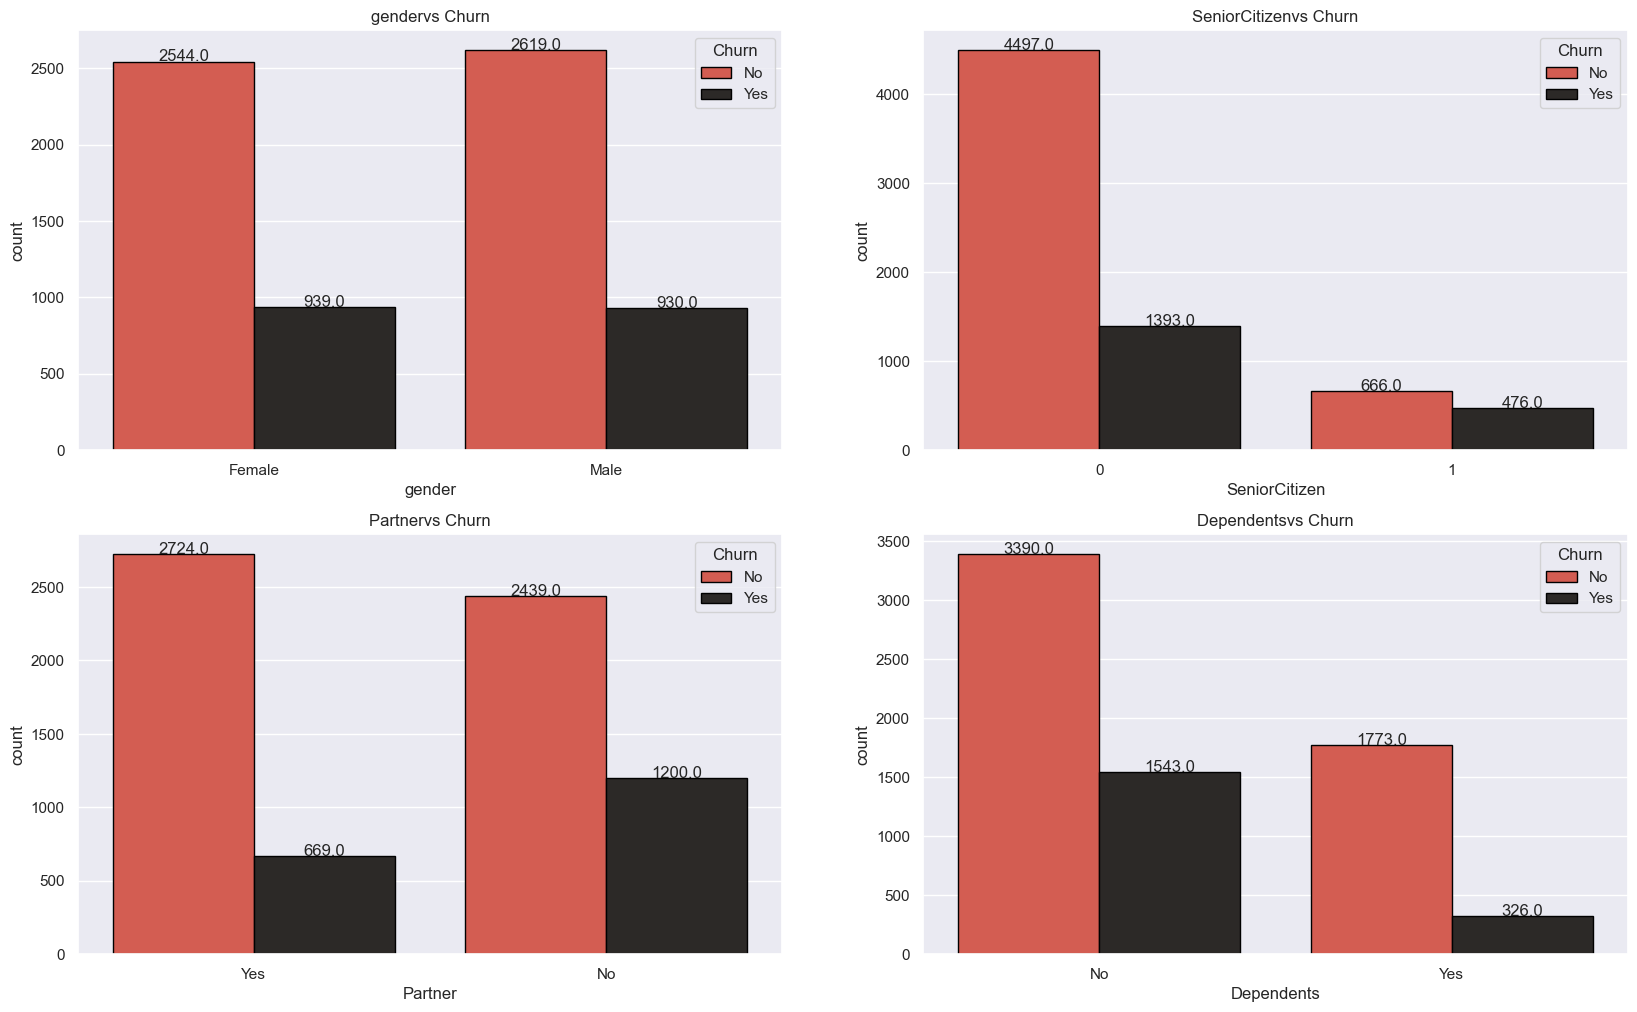

In [48]:
fig  = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=l1[i], data=data, hue='Churn', palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = l1[i] + 'vs Churn'
        plt.title(title);

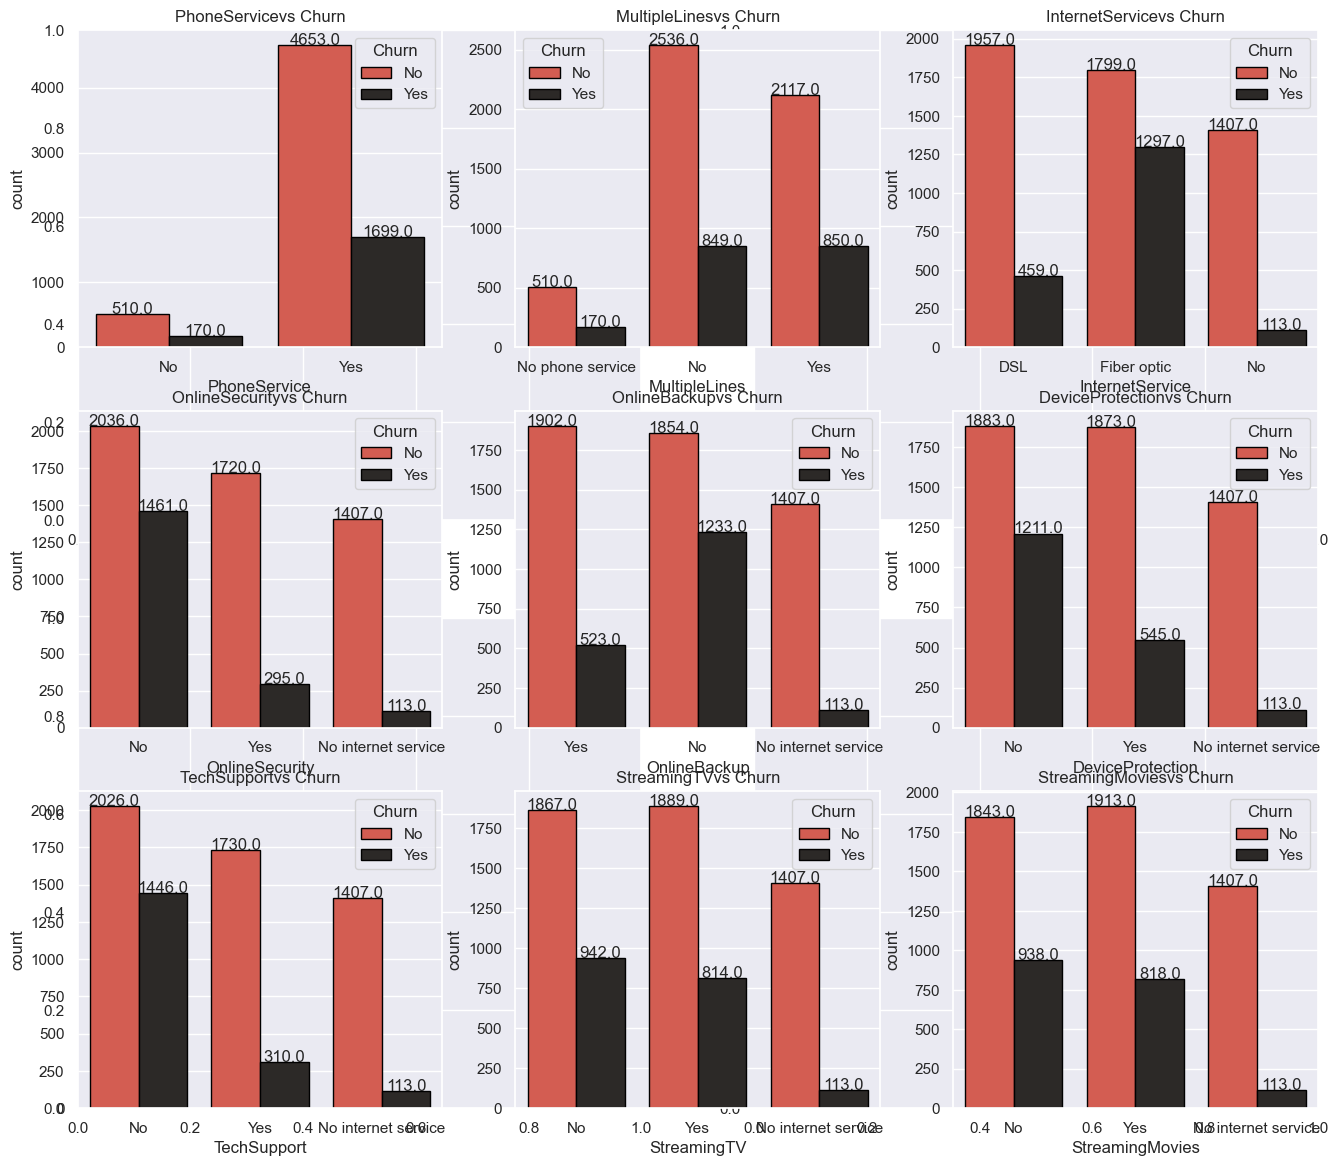

In [49]:
fig  = plt.subplots(nrows=2, ncols=2, figsize=(16,14))
for i in range(len(l2)):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(x=l2[i], data=data, hue='Churn', palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = l2[i] + 'vs Churn'
        plt.title(title)
        plt.tight_layout();

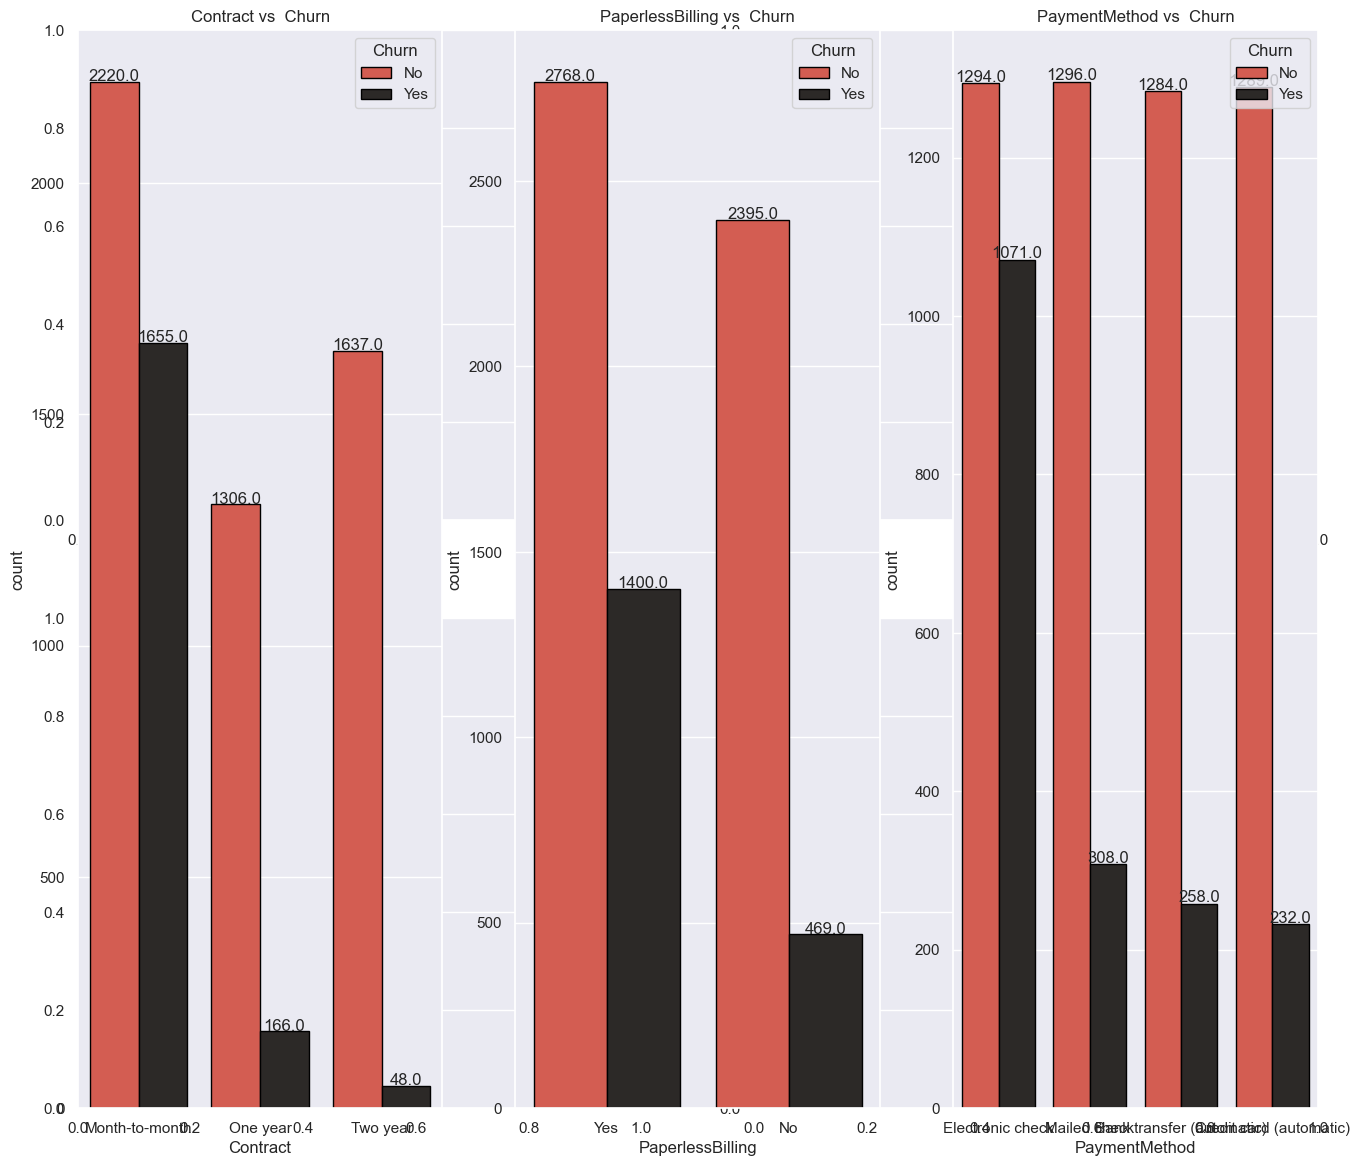

In [50]:
fig  = plt.subplots(nrows=2, ncols=2, figsize=(16,14))
for i in range(len(l3[0:3])):
    plt.subplot(1,3,i+1)
    ax = sns.countplot(x=l3[i], data=data, hue='Churn', palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = l3[i] + ' vs  Churn'
        plt.title(title)
        plt.tight_layout();

In [51]:
data['PhoneService'].value_counts()

PhoneService
Yes    6352
No      680
Name: count, dtype: int64

In [52]:
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

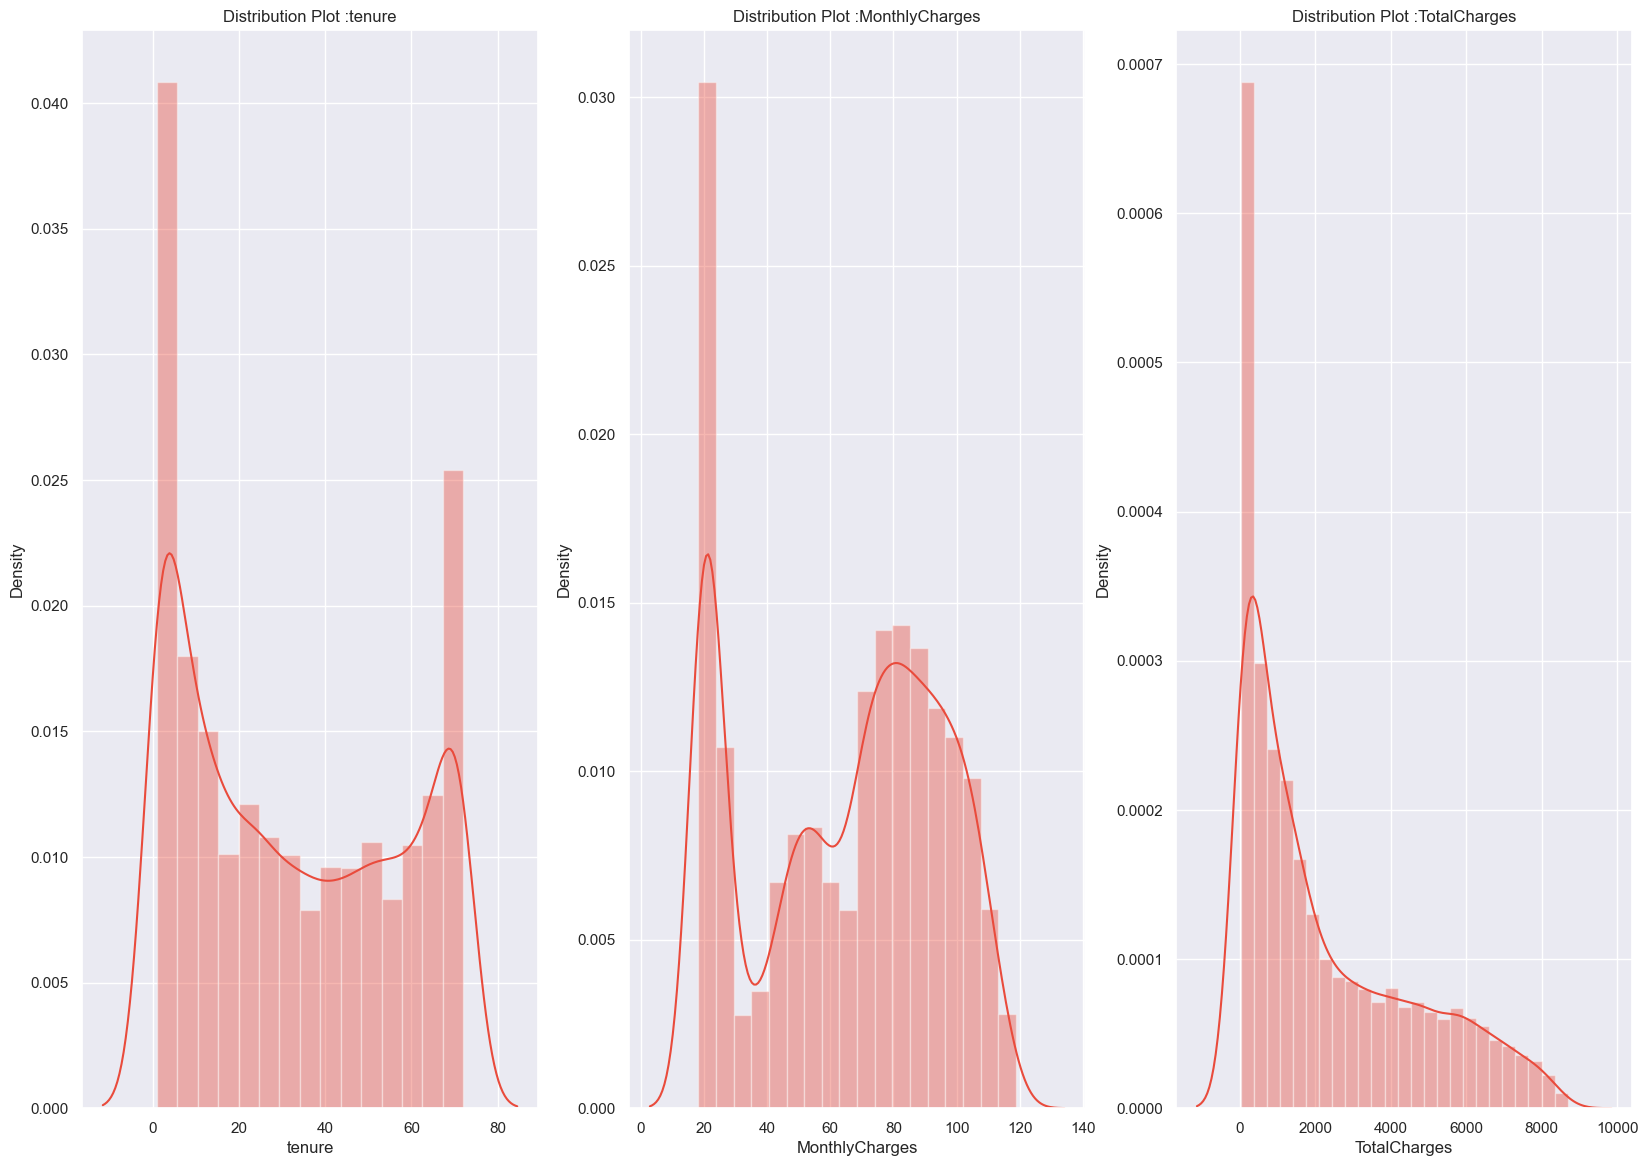

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,14))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_features[i]], color= colors[0])
    title = 'Distribution Plot :' + numerical_features[i]
    plt.title(title)
plt.show()

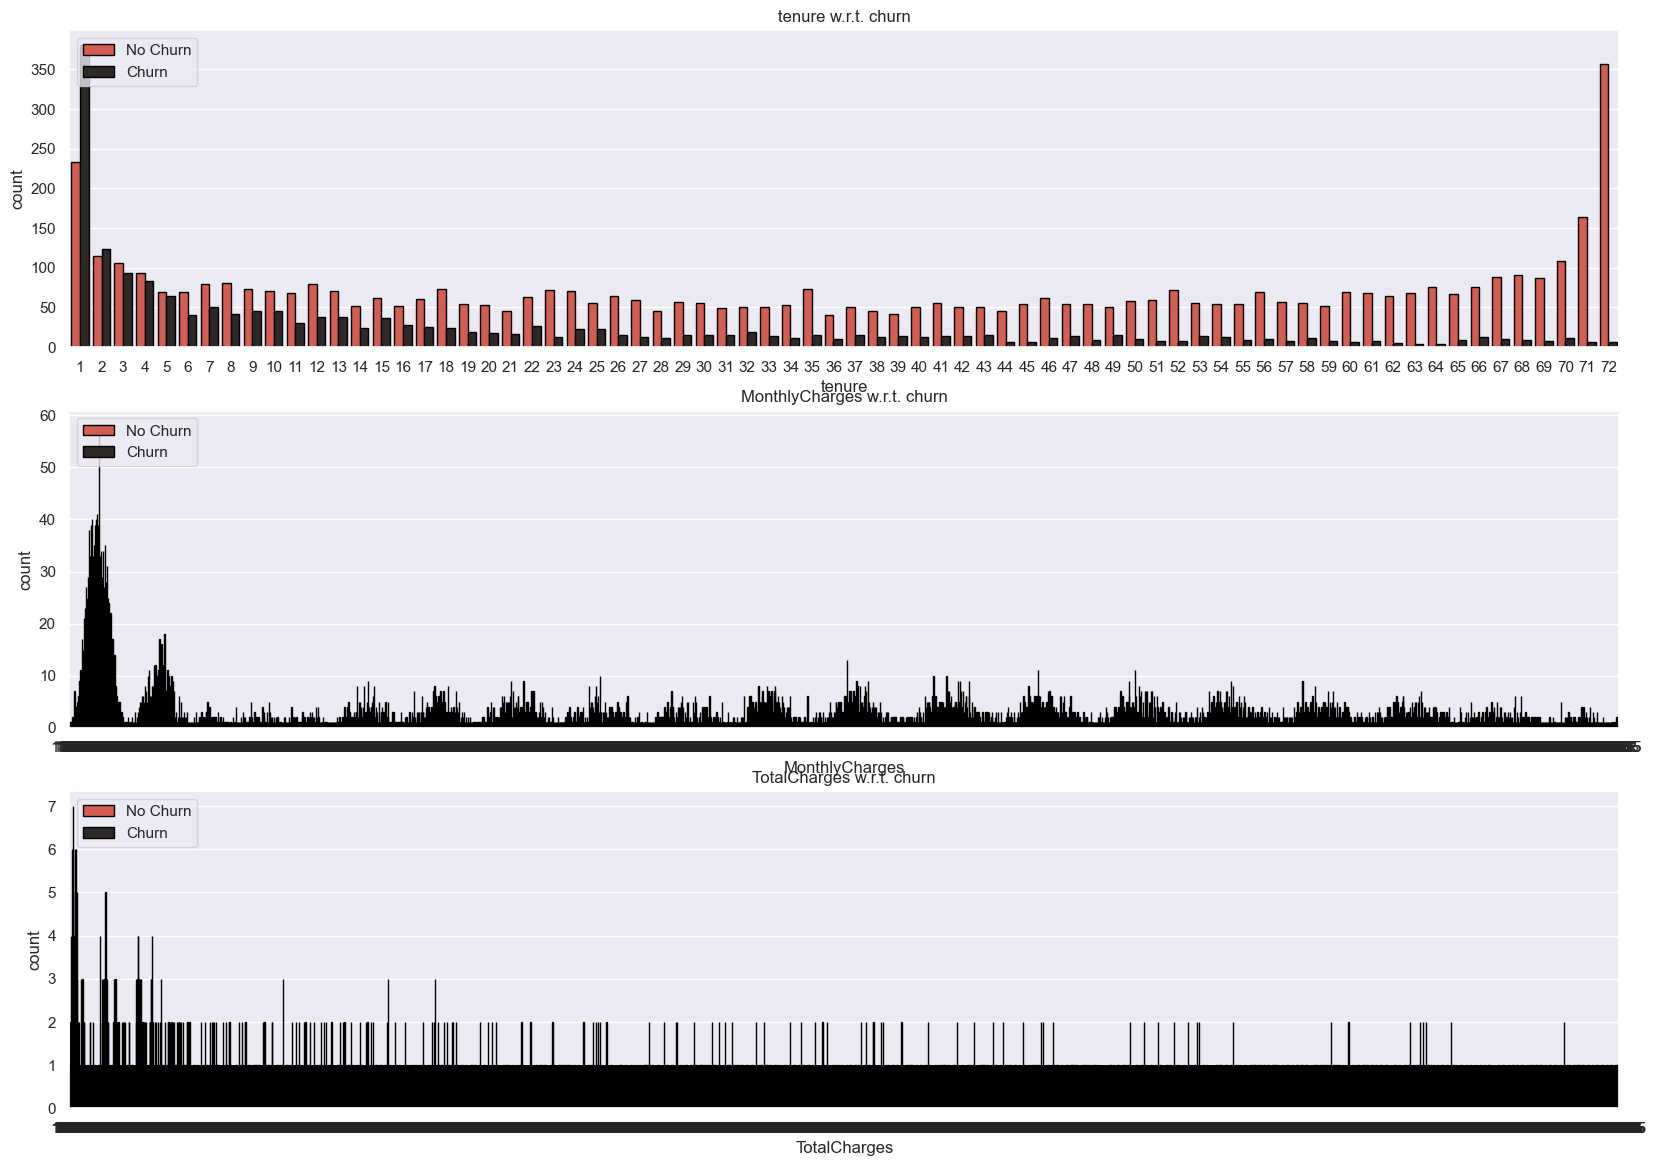

In [54]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,14))
for i in range(len(numerical_features)):
    plt.subplot(3,1, i+1)
    sns.countplot(x = numerical_features[i], data=data, hue='Churn',
    palette=colors, edgecolor='black')
    plt.legend(['No Churn', 'Churn'], loc='upper left')
    title = numerical_features[i] + ' w.r.t. churn'
    plt.title(title)
plt.show()

In [55]:
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as po

In [56]:
df1

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2           29.85         29.85      0  
1                    0              3           56.95       1889.50      0  
2                    1              3           53.85        108.15      1  
3                    0              0           42.30       1840.75      0  
4                    1              2           70.70        151.65      1  
...                ...            ...             ...           ...    ...  
7038                 1              3           84.80       1990.50      0  
7039                 1              1          103.20       7362.90      0  
7040                 1              2           29.60        346.45      0  
7041                 1              3           74.40        306.60      1  
7042                 1              0          105.65       6844.50      0  

[7032 rows x 20 columns]

In [57]:
df1.groupby('tenure').Churn.mean()

tenure
1    0.62
2    0.52
3    0.47
4    0.47
5    0.48
     ... 
68   0.09
69   0.08
70   0.09
71   0.04
72   0.02
Name: Churn, Length: 72, dtype: float64

In [58]:
tenure_chunk = df1.groupby('tenure').Churn.mean().reset_index()

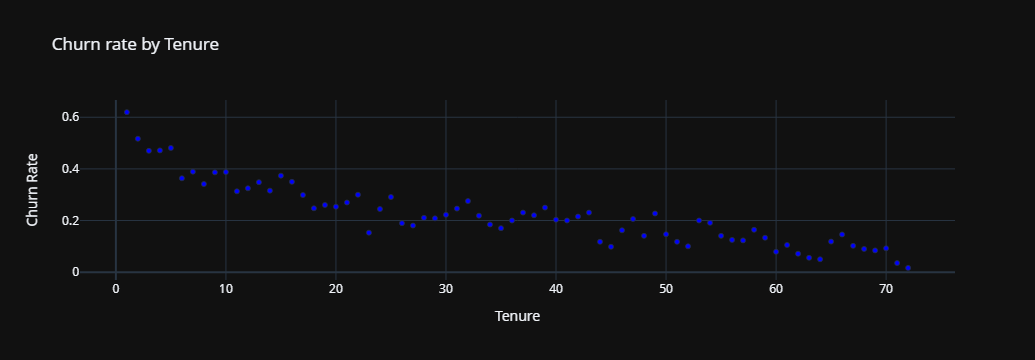

In [59]:
fig = go.Figure(data=[go.Scatter(x = tenure_chunk['tenure'], 
                                 y = tenure_chunk['Churn'], mode = 'markers',
                                 name='Low', marker = dict(size=5, 
                                                           line=dict(width=0.8),
                                                           color='blue'),)])

fig.update_layout(title = "Churn rate by Tenure", xaxis_title = "Tenure",
                  yaxis_title="Churn Rate", template = "plotly_dark")
fig.show()

In [60]:
df1.describe()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
count 7032.00        7032.00  7032.00     7032.00 7032.00       7032.00   
mean     0.50           0.16     0.48        0.30   32.42          0.90   
std      0.50           0.37     0.50        0.46   24.55          0.30   
min      0.00           0.00     0.00        0.00    1.00          0.00   
25%      0.00           0.00     0.00        0.00    9.00          1.00   
50%      1.00           0.00     0.00        0.00   29.00          1.00   
75%      1.00           0.00     1.00        1.00   55.00          1.00   
max      1.00           1.00     1.00        1.00   72.00          1.00   

       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
count        7032.00          7032.00         7032.00       7032.00   
mean            0.94             0.87            0.79          0.91   
std             0.95             0.74            0.86          0.88   
min             0.00             0.00            0.00          0.00   
25%             0.00             0.00            0.00          0.00   
50%             1.00             1.00            1.00          1.00   
75%             2.00             1.00            2.00          2.00   
max             2.00             2.00            2.00          2.00   

       DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
count           7032.00      7032.00      7032.00          7032.00   7032.00   
mean               0.90         0.80         0.98             0.99      0.69   
std                0.88         0.86         0.89             0.89      0.83   
min                0.00         0.00         0.00             0.00      0.00   
25%                0.00         0.00         0.00             0.00      0.00   
50%                1.00         1.00         1.00             1.00      0.00   
75%                2.00         2.00         2.00             2.00      1.00   
max                2.00         2.00         2.00             2.00      2.00   

       PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges   Churn  
count           7032.00        7032.00         7032.00       7032.00 7032.00  
mean               0.59           1.57           64.80       2283.30    0.27  
std                0.49           1.07           30.09       2266.77    0.44  
min                0.00           0.00           18.25         18.80    0.00  
25%                0.00           1.00           35.59        401.45    0.00  
50%                1.00           2.00           70.35       1397.47    0.00  
75%                1.00           2.00           89.86       3794.74    1.00  
max                1.00           3.00          118.75       8684.80    1.00

In [61]:
# ['tenure', 'MonthlyCharges', 'TotalCharges']
# Feature scaling is required
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1['tenure'] = scaler.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = scaler.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = scaler.fit_transform(df1[['TotalCharges']])
df1.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0   -1.28             0   
1       1              0        0           0    0.06             1   
2       1              0        0           0   -1.24             1   
3       1              0        0           0    0.51             0   
4       0              0        0           0   -1.24             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           -1.16         -0.99      0  
1                 0              3           -0.26         -0.17      0  
2                 1              3           -0.36         -0.96      1  
3                 0              0           -0.75         -0.20      0  
4                 1              2            0.20         -0.94      1

In [62]:
df1.describe()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
count 7032.00        7032.00  7032.00     7032.00 7032.00       7032.00   
mean     0.50           0.16     0.48        0.30   -0.00          0.90   
std      0.50           0.37     0.50        0.46    1.00          0.30   
min      0.00           0.00     0.00        0.00   -1.28          0.00   
25%      0.00           0.00     0.00        0.00   -0.95          1.00   
50%      1.00           0.00     0.00        0.00   -0.14          1.00   
75%      1.00           0.00     1.00        1.00    0.92          1.00   
max      1.00           1.00     1.00        1.00    1.61          1.00   

       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
count        7032.00          7032.00         7032.00       7032.00   
mean            0.94             0.87            0.79          0.91   
std             0.95             0.74            0.86          0.88   
min             0.00             0.00            0.00          0.00   
25%             0.00             0.00            0.00          0.00   
50%             1.00             1.00            1.00          1.00   
75%             2.00             1.00            2.00          2.00   
max             2.00             2.00            2.00          2.00   

       DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
count           7032.00      7032.00      7032.00          7032.00   7032.00   
mean               0.90         0.80         0.98             0.99      0.69   
std                0.88         0.86         0.89             0.89      0.83   
min                0.00         0.00         0.00             0.00      0.00   
25%                0.00         0.00         0.00             0.00      0.00   
50%                1.00         1.00         1.00             1.00      0.00   
75%                2.00         2.00         2.00             2.00      1.00   
max                2.00         2.00         2.00             2.00      2.00   

       PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges   Churn  
count           7032.00        7032.00         7032.00       7032.00 7032.00  
mean               0.59           1.57            0.00         -0.00    0.27  
std                0.49           1.07            1.00          1.00    0.44  
min                0.00           0.00           -1.55         -1.00    0.00  
25%                0.00           1.00           -0.97         -0.83    0.00  
50%                1.00           2.00            0.18         -0.39    0.00  
75%                1.00           2.00            0.83          0.67    1.00  
max                1.00           3.00            1.79          2.82    1.00

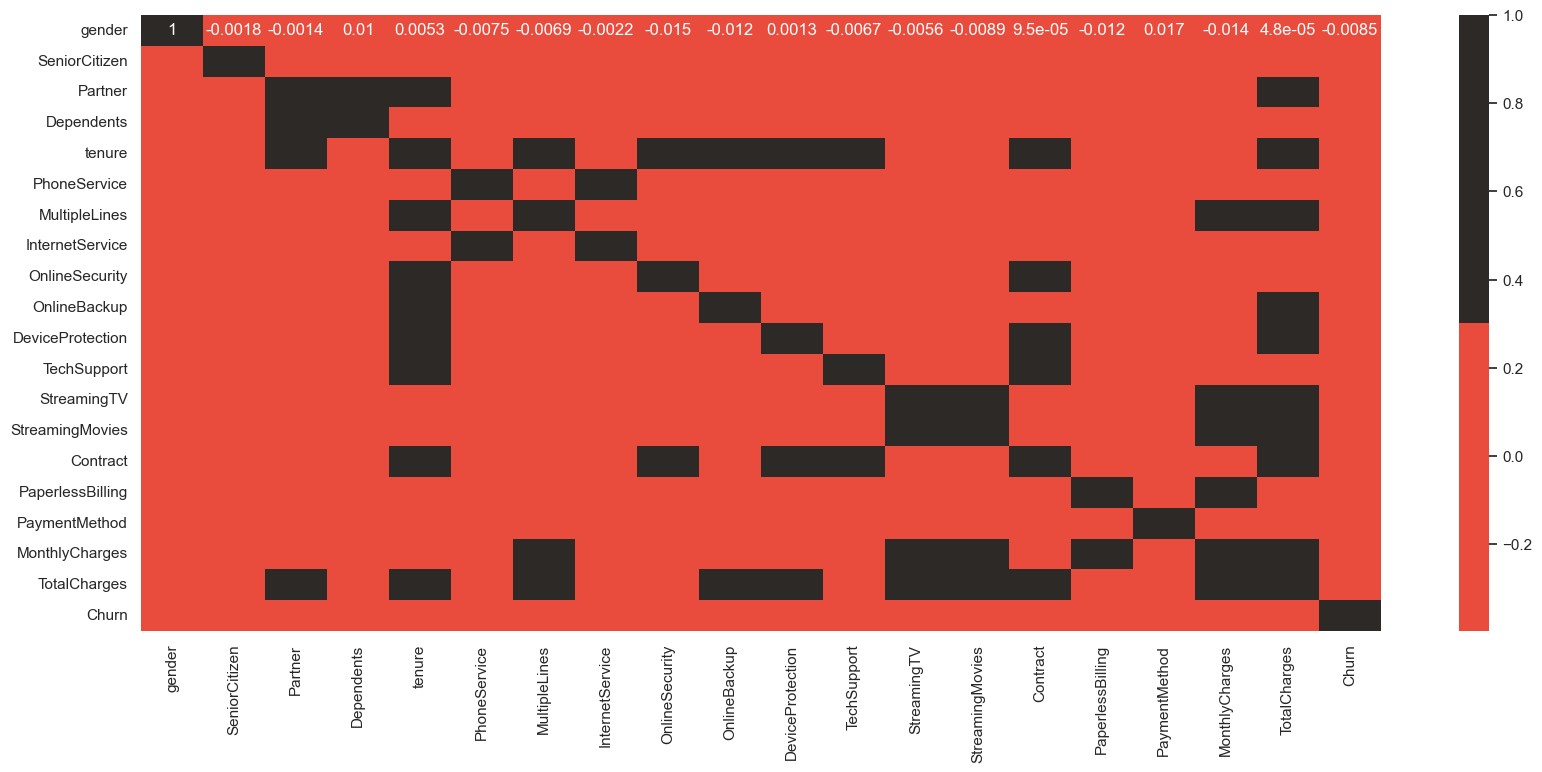

In [63]:
# Correlation part :

plt.figure(figsize=(20,8))
sns.heatmap(df1.corr(), cmap=colors, annot=True);

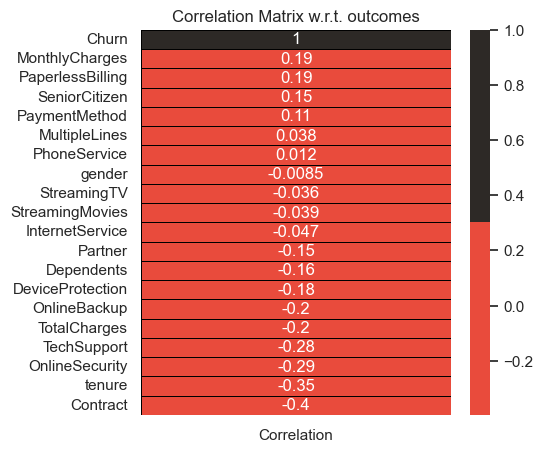

In [64]:
corr = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, cmap=colors, linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix w.r.t. outcomes")
plt.show()

In [65]:
# categorical_features - chi-square test
# numerical_features  - Anova test

In [66]:
# Chi-Square Test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

In [67]:
df1.head(1)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0   -1.28             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           -1.16         -0.99      0

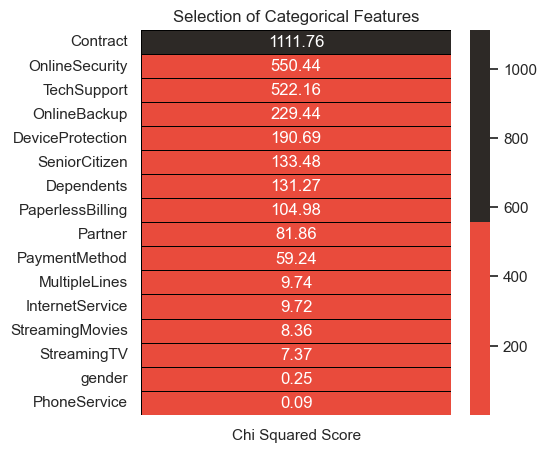

In [68]:
# Chi-Square Test :
features = df1.loc[:,categorical_features] # char
target = df1.loc[:,'Churn'] # cat
best_features = SelectKBest(score_func = chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(categorical_features),
                             columns = ['Chi Squared Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'Chi Squared Score'),
            annot=True, cmap = colors, linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Categorical Features')
plt.show()

In [69]:
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [70]:
# Anova Testing : numerical_features
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [71]:
from sklearn.feature_selection import f_classif

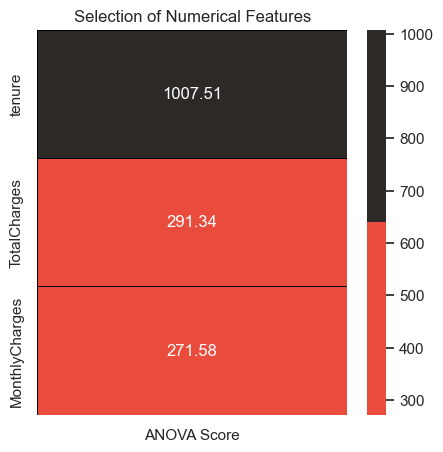

In [72]:
# Anova Testing

features = df1.loc[:,numerical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(features.columns),
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, cmap = colors, linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()

In [73]:
# Drop the non-significant variable
df1.drop(columns = ['gender','PhoneService','StreamingTV','StreamingMovies','InternetService','MultipleLines'], inplace=True)
df1.head()

SeniorCitizen  Partner  Dependents  tenure  OnlineSecurity  OnlineBackup  \
0              0        1           0   -1.28               0             2   
1              0        0           0    0.06               2             0   
2              0        0           0   -1.24               2             2   
3              0        0           0    0.51               2             0   
4              0        0           0   -1.24               0             0   

   DeviceProtection  TechSupport  Contract  PaperlessBilling  PaymentMethod  \
0                 0            0         0                 1              2   
1                 2            0         1                 0              3   
2                 0            0         0                 1              3   
3                 2            2         1                 0              0   
4                 0            0         0                 1              2   

   MonthlyCharges  TotalCharges  Churn  
0           -1.16         -0.99      0  
1           -0.26         -0.17      0  
2           -0.36         -0.96      1  
3           -0.75         -0.20      0  
4            0.20         -0.94      1

In [74]:
df1['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [75]:
df1['Churn'].value_counts(normalize=True)

Churn
0   0.73
1   0.27
Name: proportion, dtype: float64

In [77]:
# Handling imbalance dataset
import imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
smote = SMOTE()
f1 = df1.iloc[:,:-1].values
t1 = df1.iloc[:,-1].values
f1, t1 = smote.fit_resample(f1, t1)
print(df1.iloc[:,-1].value_counts())
print(Counter(t1))

Churn
0    5163
1    1869
Name: count, dtype: int64
Counter({0: 5163, 1: 5163})


In [85]:
# Model Building

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold

In [136]:
x_train, x_test, y_train, y_test = train_test_split(f1,t1, test_size=0.2, random_state=101, stratify=t1)

In [114]:
def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state=1)
    print("Cross Validation Score :", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train,
                                                                       cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC_Score :", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    #roc_curve(classifier, x_test, y_test)
    plt.title("ROC_AUC_Plot")
    plt.show()

def model_evaluation(classifier, x_test, y_test):
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
    print(classification_report(y_test, classifier.predict(x_test)))
    print(accuracy_score(y_test, classifier.predict(x_test)))

In [111]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=70,max_depth=4,random_state=1)

Cross Validation Score : 85.89%
ROC_AUC_Score : 78.45%


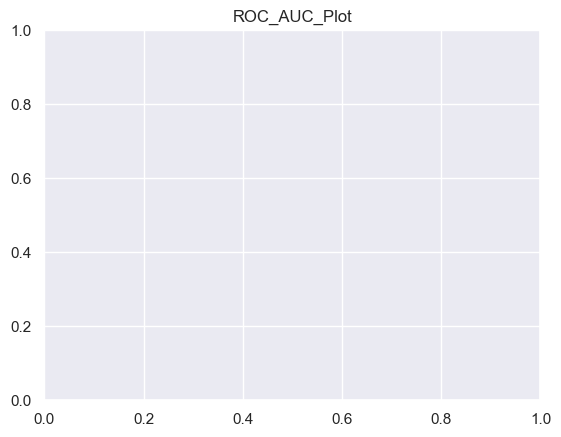

In [115]:
model(classifier_rf,x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1030
           1       0.76      0.83      0.80      1036

    accuracy                           0.78      2066
   macro avg       0.79      0.78      0.78      2066
weighted avg       0.79      0.78      0.78      2066

0.7846079380445304


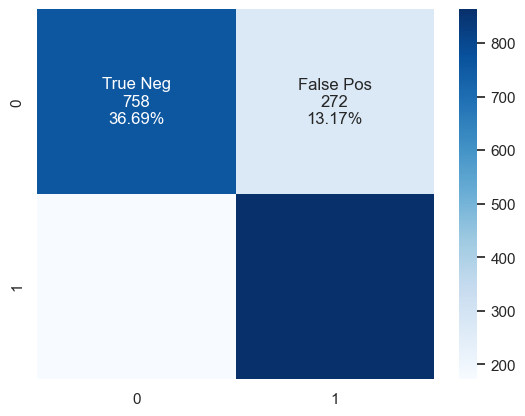

In [116]:
model_evaluation(classifier_rf, x_test, y_test)

In [117]:
#!pip install xgboost

In [119]:
# XGBoost Classifier
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(learning_rate=0.01,max_depth=4,n_estimators=500)

Cross Validation Score : 90.24%
ROC_AUC_Score : 82.71%


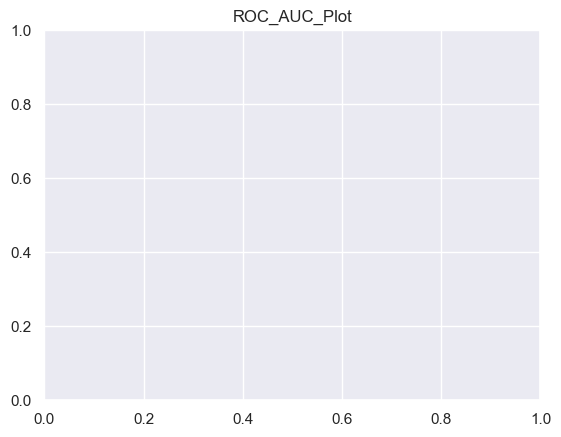

In [120]:
model(classifier_xgb,x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1030
           1       0.81      0.86      0.83      1036

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066

0.8272023233301065


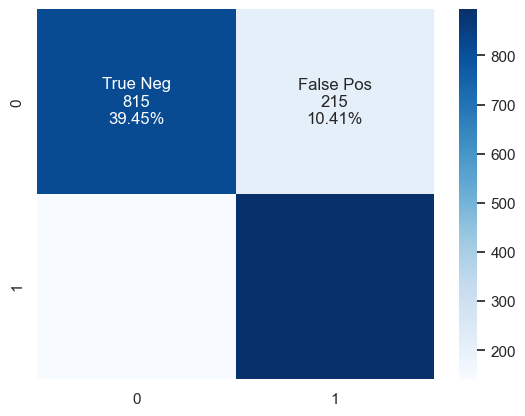

In [121]:
model_evaluation(classifier_xgb, x_test, y_test)

In [124]:
#!pip install lightgbm

In [129]:
# LightGBM Boosting
from lightgbm import LGBMClassifier
classifier_lgbm = LGBMClassifier(learning_rate=0.01,max_depth=4,n_estimators=500)

[LightGBM] [Info] Number of positive: 4127, number of negative: 4133
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1608
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499637 -> initscore=-0.001453
[LightGBM] [Info] Start training from score -0.001453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

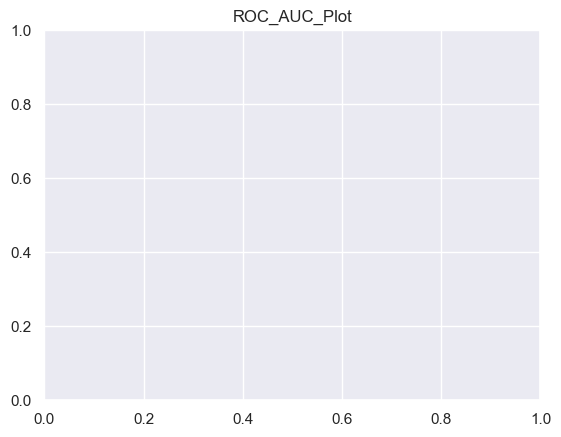

In [130]:
model(classifier_lgbm,x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1030
           1       0.81      0.87      0.84      1036

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066

0.8305905130687319


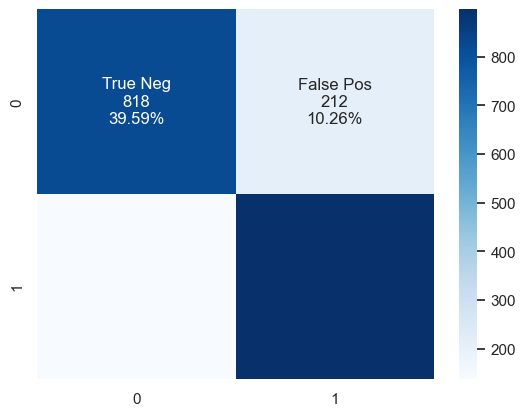

In [131]:
model_evaluation(classifier_lgbm, x_test, y_test)

In [132]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)
training = cross_val_score(logit, x_train, y_train, cv= 10)
print(training.mean())
y_pred = logit.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7684019370460048
0.7633107454017425


In [135]:
training

array([0.75302663, 0.76755448, 0.77360775, 0.77966102, 0.75181598,
       0.77118644, 0.77845036, 0.75544794, 0.76997579, 0.78329298])

In [133]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [134]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7697336561743341
0.7633107454017425
